Explained variance ratio for Lifestyle dataset PCA: [0.08378326 0.06184324]
Explained variance ratio for Clinical dataset PCA: [0.21254053 0.11820708]


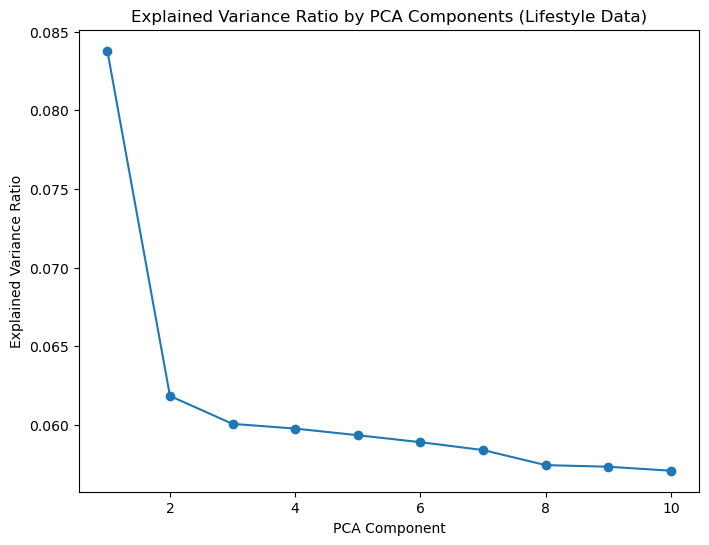

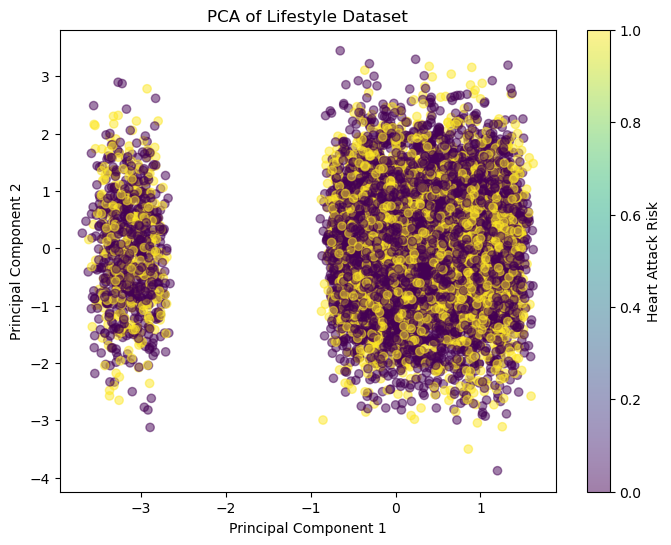

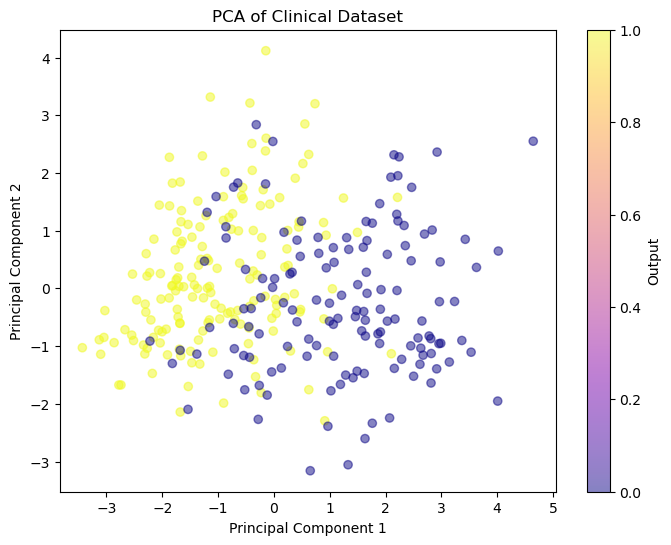

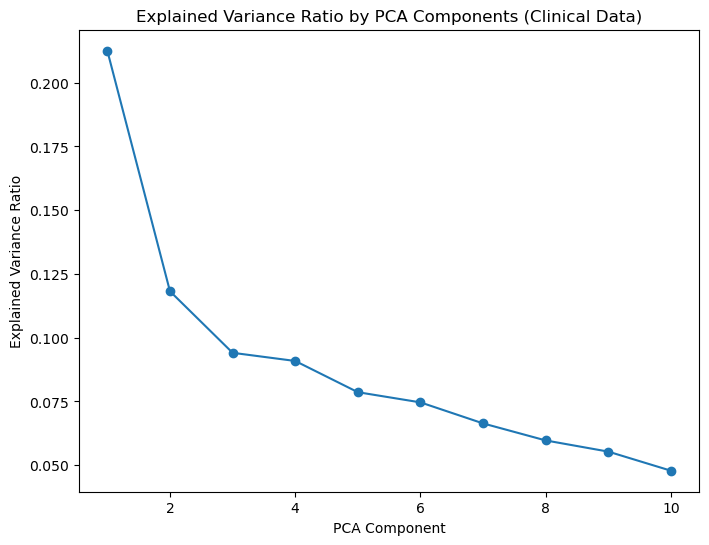

/opt/anaconda3/envs/ENGG2112/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


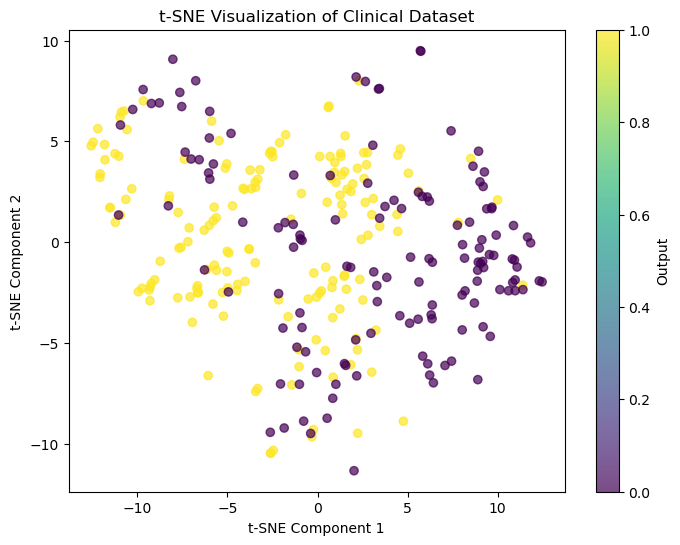

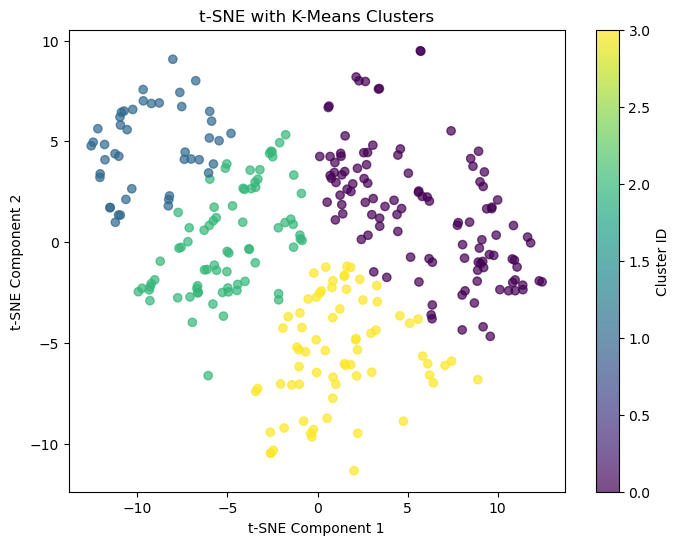

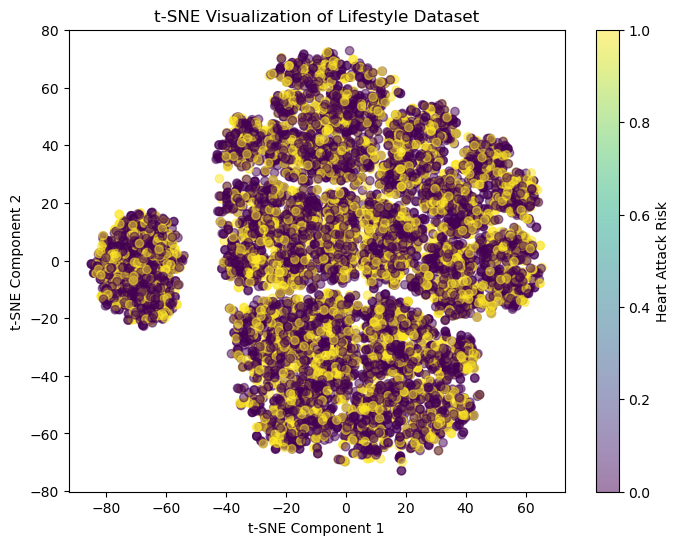

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Load data
clinical_data = pd.read_csv('clinical.csv')
lifestyle_data = pd.read_csv('lifestyle.csv')

# View basic information
#print(clinical_data.head())
#print(lifestyle_data.head())

#Dropping more columns from lfestyle dataset
columns_to_remove = ['Hemisphere', 'Patient ID', 'Income', 'Continent', 'Country']
lifestyle_data = lifestyle_data.drop(columns=columns_to_remove)

#print(lifestyle_data.head())


# Preprocessing the lifestyle dataset by dropping the output column
Xlifestyle = lifestyle_data.drop('Heart Attack Risk', axis=1)
Ylifestyle = lifestyle_data['Heart Attack Risk']

# Checking the column names to make sure 'Sex' exists
#print(Xlifestyle.columns)

# Identify categorical columns 
categorical_columns = ['Sex']

# Create a column transformer for handling both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), Xlifestyle.select_dtypes(include=['float64', 'int64']).columns),  # Numerical columns
        ('cat', OneHotEncoder(), categorical_columns)  # Categorical columns
    ])

# Fit the preprocessor and transform the data
Xlifestyle_scaled = preprocessor.fit_transform(Xlifestyle)

# Now you can proceed with your ML model, e.g., splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(Xlifestyle_scaled, Ylifestyle, test_size=0.2, random_state=42)

# Check the shape of the scaled and transformed dataset
#print(Xlifestyle_scaled.shape)

# Preprocessing the clinical dataset by dropping the output column
Xclinical = clinical_data.drop('output', axis=1)
Yclinical = clinical_data['output']

#print(Xlifestyle.head())

from sklearn.decomposition import PCA

# Preprocess the clinical dataset (Standard Scaling)
clinical_numeric_columns = Xclinical.select_dtypes(include=['float64', 'int64']).columns
clinical_scaler = StandardScaler()
Xclinical_scaled = clinical_scaler.fit_transform(Xclinical[clinical_numeric_columns])

# Apply PCA on the lifestyle dataset
pca_lifestyle = PCA(n_components=2)  # Adjust n_components as needed
Xlifestyle_pca = pca_lifestyle.fit_transform(Xlifestyle_scaled)

# Apply PCA on the clinical dataset
pca_clinical = PCA(n_components=2)  # Adjust n_components as needed
Xclinical_pca = pca_clinical.fit_transform(Xclinical_scaled)

# Check the explained variance ratio to understand how much variance is captured
print("Explained variance ratio for Lifestyle dataset PCA:", pca_lifestyle.explained_variance_ratio_)
print("Explained variance ratio for Clinical dataset PCA:", pca_clinical.explained_variance_ratio_)

# Optionally, you can visualize the PCA results to see how well the datasets are represented in 2D space


# Increase the number of components
pca_lifestyle = PCA(n_components=10)  # Adjust to capture more variance
Xlifestyle_pca = pca_lifestyle.fit_transform(Xlifestyle_scaled)

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), pca_lifestyle.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Explained Variance Ratio by PCA Components (Lifestyle Data)')
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plot Lifestyle PCA
plt.figure(figsize=(8, 6))
plt.scatter(Xlifestyle_pca[:, 0], Xlifestyle_pca[:, 1], c=Ylifestyle, cmap='viridis', alpha=0.5)
plt.title("PCA of Lifestyle Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Heart Attack Risk')
plt.show()

# Plot Clinical PCA
plt.figure(figsize=(8, 6))
plt.scatter(Xclinical_pca[:, 0], Xclinical_pca[:, 1], c=Yclinical, cmap='plasma', alpha=0.5)
plt.title("PCA of Clinical Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Output')
plt.show()

# Apply PCA with more components to visualize the explained variance ratio
pca_clinical = PCA(n_components=10)
pca_clinical.fit(Xclinical_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), pca_clinical.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Explained Variance Ratio by PCA Components (Clinical Data)')
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.show()
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming the clinical data has been scaled and prepared as 'Xclinical_scaled'
# Apply t-SNE to the scaled clinical data
tsne_clinical = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
Xclinical_tsne = tsne_clinical.fit_transform(Xclinical_scaled)

# Visualize the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(Xclinical_tsne[:, 0], Xclinical_tsne[:, 1], c=Yclinical, cmap='viridis', alpha=0.7)
plt.title("t-SNE Visualization of Clinical Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Output')
plt.show()

from sklearn.cluster import KMeans
import pandas as pd

# Apply K-Means clustering to the t-SNE output
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(Xclinical_tsne)

# Add the cluster labels to the t-SNE DataFrame
tsne_results = pd.DataFrame(Xclinical_tsne, columns=['Component 1', 'Component 2'])
tsne_results['Cluster'] = clusters
tsne_results['Output'] = Yclinical

# Visualize clusters with t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results['Component 1'], tsne_results['Component 2'], c=tsne_results['Cluster'], cmap='viridis', alpha=0.7)
plt.title("t-SNE with K-Means Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Cluster ID')
plt.show()

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to the scaled lifestyle data
tsne = TSNE(n_components=2, perplexity=30, random_state=42)  # Adjust perplexity if needed
Xlifestyle_tsne = tsne.fit_transform(Xlifestyle_scaled)

# Visualize the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(Xlifestyle_tsne[:, 0], Xlifestyle_tsne[:, 1], c=Ylifestyle, cmap='viridis', alpha=0.5)
plt.title("t-SNE Visualization of Lifestyle Dataset")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Heart Attack Risk')
plt.show()

